# Titanic Dataset - Classification Ex (predict survival)


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [7]:
df['Sex'] = (df['Sex']=='female').astype(int)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df = df.drop(['Cabin'], axis=1)

In [14]:
df_encoded = pd.get_dummies(df, columns=['Embarked'], dtype=int)
print(df_encoded)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


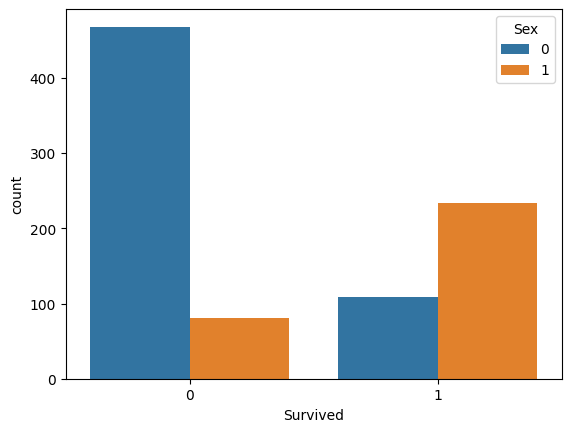

In [16]:
sns.countplot(x='Survived',hue='Sex', data=df)
plt.show()

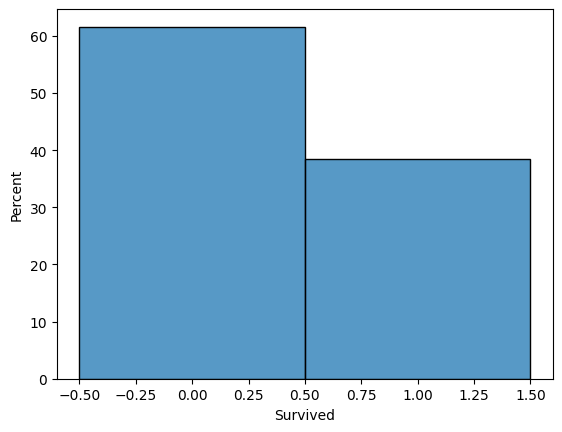

In [17]:
sns.histplot(x='Survived', data=df, discrete=True, stat='percent' )
plt.show()

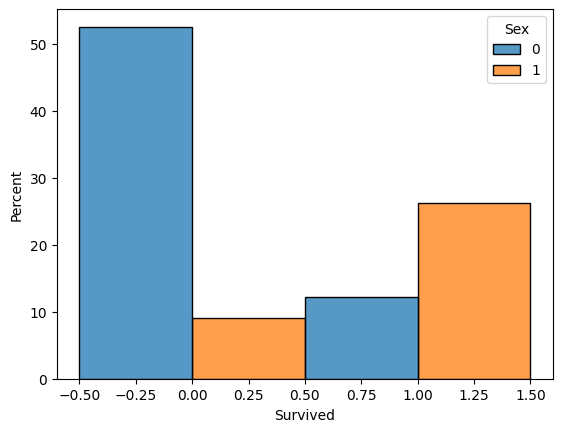

In [18]:
sns.histplot(x='Survived', hue='Sex', data=df, discrete=True, stat='percent', multiple='dodge')
plt.show()

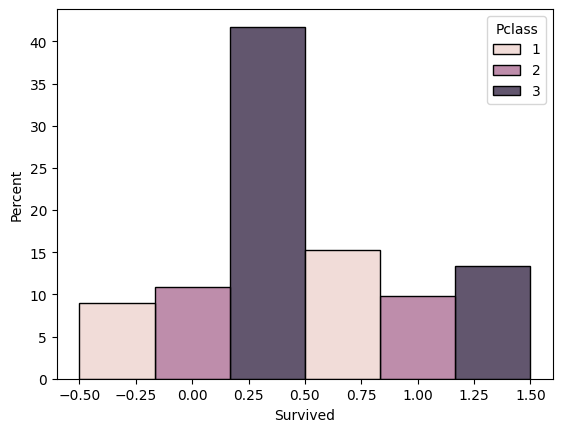

In [19]:
# Compare survival by gender.
sns.histplot(x='Survived', hue='Pclass',data=df, stat='percent', discrete=True, multiple='dodge')
plt.show()

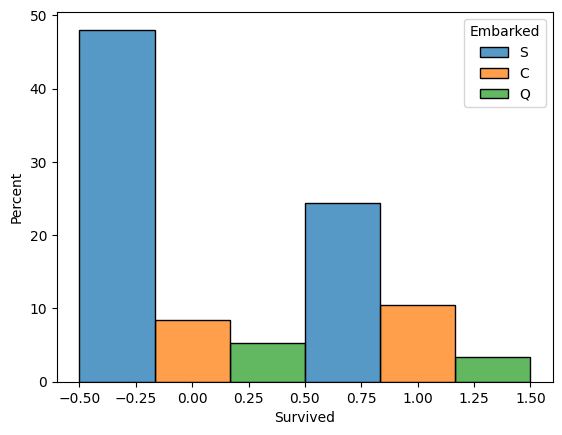

In [20]:
# Compare survival by embarkation point (Embarked).
sns.histplot(x='Survived', hue='Embarked', data=df, discrete=True, multiple='dodge', stat='percent')
plt.show()

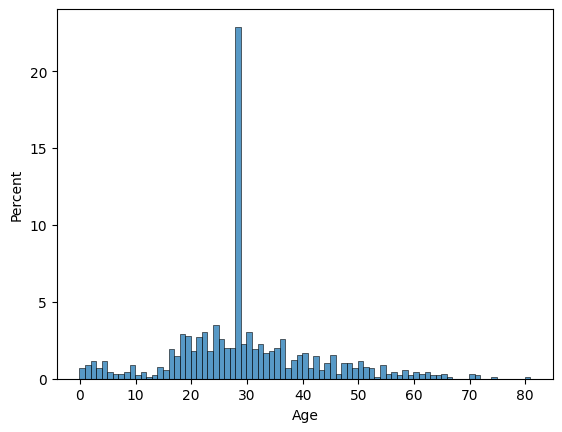

In [21]:
# Histograms for Age, Fare.
sns.histplot(x='Age', data=df, discrete=True, stat='percent')
plt.show()

In [22]:
# Family size = SibSp + Parch + 1.
df['Family_size'] = df['SibSp'] + df['Parch'] + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,1


In [23]:
# IsAlone (1 if no family, else 0).
df['IsAlone'] = ((df['Family_size'] > 0) == 0).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,1,0


In [24]:
# Age groups (child, adult, senior).
def age_group(age):
  if age < 18:
    return 'child'
  elif age < 40:
    return 'adult'
  elif age > 40:
    return 'senior'
df['Age_Group'] = df['Age'].apply(age_group)

In [25]:
df['fare'] = pd.to_numeric(df['Fare'], errors='coerce')

In [26]:
# Scale Fare and Age (StandardScaler/MinMaxScaler).
scaler = MinMaxScaler()
df[['Fare_scaled', 'Age_scaled']] = scaler.fit_transform(df[['Age', 'Fare']])


# Train, Test, Val Dataset

In [27]:
X = df.drop(['Survived', 'Name', 'Ticket', 'Embarked', 'Age_Group'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,IsAlone,Age_Group,fare,Fare_scaled,Age_scaled
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,2,0,adult,7.2500,0.271174,0.014151
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,2,0,adult,71.2833,0.472229,0.139136
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,adult,7.9250,0.321438,0.015469
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,2,0,adult,53.1000,0.434531,0.103644
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,1,0,adult,8.0500,0.434531,0.015713


# Logistic Regression

In [29]:
# Logistic Regression (baseline).
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model_lg = LogisticRegression(max_iter=500)
model_lg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [30]:
y_pred = model_lg.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       112
           1       0.72      0.79      0.75        67

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179



# Random Forest

In [31]:
# Random Forest.
from sklearn.ensemble import RandomForestClassifier

In [32]:
model_rf = RandomForestClassifier(n_estimators=500)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [33]:
y_pred = model_rf.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       109
           1       0.76      0.80      0.78        70

    accuracy                           0.82       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.82      0.82      0.82       179



# Decision Tree

In [34]:
## Decision Tree.
from sklearn.tree import DecisionTreeClassifier

In [35]:
model_dt = DecisionTreeClassifier(max_depth=3)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [36]:
y_pred = model_dt.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       115
           1       0.69      0.80      0.74        64

    accuracy                           0.80       179
   macro avg       0.78      0.80      0.79       179
weighted avg       0.81      0.80      0.80       179



# SVM

In [37]:
# SVM
from sklearn.svm import SVC

In [38]:
model_scm = SVC()
model_scm.fit(X_train, y_train)

SVC()

In [39]:
y_pred = model_scm.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.62      0.76       165
           1       0.16      0.86      0.27        14

    accuracy                           0.64       179
   macro avg       0.57      0.74      0.52       179
weighted avg       0.92      0.64      0.72       179



# KNN

In [40]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [41]:
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [42]:
y_pred = model_knn.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75       134
           1       0.41      0.67      0.50        45

    accuracy                           0.67       179
   macro avg       0.63      0.67      0.63       179
weighted avg       0.74      0.67      0.69       179



# Extreme Gradient Boosting Method - XGBoost

In [43]:
# XGBoost (advanced)
from xgboost import XGBClassifier

In [44]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [45]:
y_pred = model_xgb.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       108
           1       0.72      0.75      0.73        71

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



# LightGBM

In [46]:
# LightGBM
from lightgbm import LGBMClassifier

In [47]:
model_lgb = LGBMClassifier()
model_lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 722
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

LGBMClassifier()

In [48]:
y_pred = model_lgb.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# Hyperparameter Tuning - Grid Search CV

In [49]:
# Hyperparameter tuning (GridSearchCV / RandomizedSearchCV).
from sklearn.model_selection import GridSearchCV

In [50]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

In [51]:
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [52]:
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.832837584950261


In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [54]:
param_dist ={
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20)
}

In [55]:
rand_search = RandomizedSearchCV(RandomForestClassifier(), param_dist, cv=5, n_iter=10, scoring='accuracy', random_state=42 )
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79ef7abb6960>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79ef7a79f290>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x79ef7a79fb60>},
                   random_state=42, scoring='accuracy')

In [56]:
print("Best Parameter:", rand_search.best_params_)
print("Best Score:", rand_search.best_score_)

Best Parameter: {'max_depth': 12, 'min_samples_split': 17, 'n_estimators': 64}
Best Score: 0.8300305328474342


In [57]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
importance = model.feature_importances_
feature_names = X.columns

In [59]:
feat_imp = pd.DataFrame({"Feature":feature_names, "Importance": importance})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

In [60]:
print(feat_imp)

        Feature  Importance
2           Sex    0.239536
0   PassengerId    0.132987
6          Fare    0.102695
9          fare    0.099988
10  Fare_scaled    0.097125
3           Age    0.095779
11   Age_scaled    0.093176
1        Pclass    0.061010
7   Family_size    0.038602
4         SibSp    0.021869
5         Parch    0.017233
8       IsAlone    0.000000


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128674 (\N{SHIP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


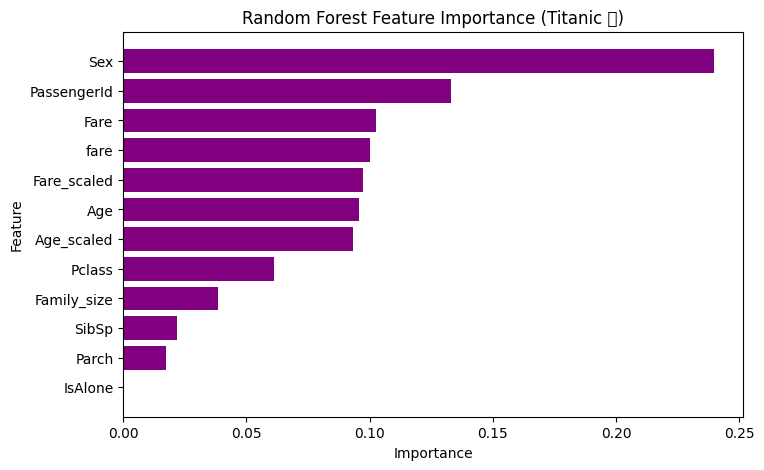

In [61]:
plt.figure(figsize=(8, 5))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='purple')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance (Titanic 🚢)')
plt.gca().invert_yaxis()
plt.show()